# Read in end use consumption from ResStock building file

In [33]:
import pandas as pd

In [34]:
TIMESERIES_FILEPATH = "./239227-0.parquet"
METADATA_FILEPATH = "./wakefield_metadata.csv"

In [35]:
end_use_df = pd.read_parquet(TIMESERIES_FILEPATH)
metadata_df = pd.read_csv(METADATA_FILEPATH)

In [36]:
bldg_metadata = metadata_df[metadata_df["bldg_id"] == 239227]

In [37]:
bldg_metadata["in.cooking_range"]

102    Electric, 100% Usage
Name: in.cooking_range, dtype: object

In [38]:
cooking = end_use_df[[
    "timestamp",
    "out.electricity.cooking_range.energy_consumption",
    "out.electricity.cooking_range.energy_consumption_intensity",
    "out.natural_gas.cooking_range.energy_consumption",
    "out.natural_gas.cooking_range.energy_consumption_intensity",
    "out.propane.cooking_range.energy_consumption",
    "out.propane.cooking_range.energy_consumption_intensity",
]]

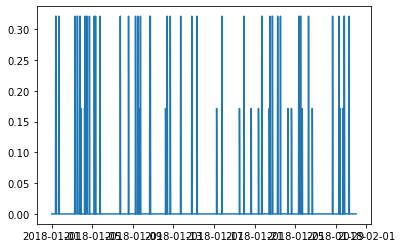

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    cooking["timestamp"].iloc[:30*24*4].values,
    cooking["out.electricity.cooking_range.energy_consumption"].iloc[:30*24*4].values
)
plt.show()

In [40]:
len(cooking["timestamp"])

35040

In [41]:
cooking

,timestamp,out.electricity.cooking_range.energy_consumption,out.electricity.cooking_range.energy_consumption_intensity,out.natural_gas.cooking_range.energy_consumption,out.natural_gas.cooking_range.energy_consumption_intensity,out.propane.cooking_range.energy_consumption,out.propane.cooking_range.energy_consumption_intensity
bldg_id,,,,,,,
239227,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0
239227,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0
239227,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0
239227,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0
239227,2018-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
239227,2018-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0
239227,2018-12-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0
239227,2018-12-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
TIMESERIES_FILEPATH = "./433759-0.parquet"

In [43]:
end_use_gas_df = pd.read_parquet(TIMESERIES_FILEPATH)

In [44]:
metadata_df[metadata_df["bldg_id"] == 433759]["in.cooking_range"]

184    Gas, 100% Usage
Name: in.cooking_range, dtype: object

In [45]:
cooking_gas = end_use_gas_df[[
    "timestamp",
    "out.electricity.cooking_range.energy_consumption",
    "out.electricity.cooking_range.energy_consumption_intensity",
    "out.natural_gas.cooking_range.energy_consumption",
    "out.natural_gas.cooking_range.energy_consumption_intensity",
    "out.propane.cooking_range.energy_consumption",
    "out.propane.cooking_range.energy_consumption_intensity",
]]

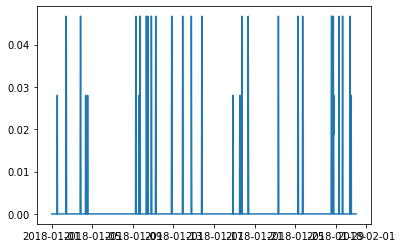

In [46]:
plt.figure()
plt.plot(
    cooking_gas["timestamp"].iloc[:30*24*4].values,
    cooking_gas["out.electricity.cooking_range.energy_consumption"].iloc[:30*24*4].values
)
plt.show()

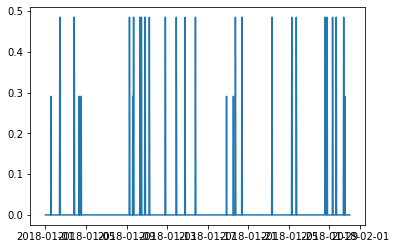

In [47]:
plt.figure()
plt.plot(
    cooking_gas["timestamp"].iloc[:30*24*4].values,
    cooking_gas["out.natural_gas.cooking_range.energy_consumption"].iloc[:30*24*4].values
)
plt.show()

# Summary
Can grab the out energy use of an appliance by pulling the proper building timeseries from ResStock. Need to query based on the building ID. So the process would be...
* Match parcel to ResStock building
* Pull ResStock building profile
* Extract cooking_range energy consumption

Doesn't offer lots of granularity on replacement or on different range types at the moment. Could probably get a bit more information based on the metadata into the model for that ResStock building (in.cooking_range... maybe others based on user behavior? It's possible we'd have to dive deeper into the ResStock methodology to know more on what influences cooking range profiles)

In [48]:
cooking = cooking.set_index("timestamp")

In [49]:
# Make timestamps time-beginning rather than time-ending
cooking.index = cooking.index.shift(-15, "T")

In [51]:
# Resample to hourly
cooking = cooking.resample("H").sum()

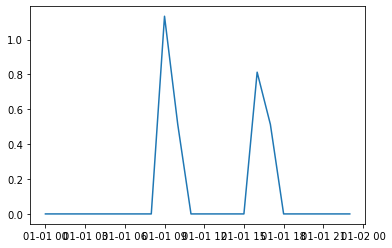

In [52]:
plt.figure()
plt.plot(
    cooking.index[:24],
    cooking["out.electricity.cooking_range.energy_consumption"].iloc[:24].values
)
plt.show()

In [54]:
annual_consumption = cooking["out.electricity.cooking_range.energy_consumption"].sum()
print(annual_consumption)

550.9341016805938


In [61]:
cooking.index = cooking.index.strftime("%Y-%m-%dT%H:%M:%S")

In [64]:
cooking["out.electricity.cooking_range.energy_consumption"].to_json(
    "../config_files/stoves/elec_stove_elec_consump.json",
    # date_format="iso",
    # date_unit="s"
)

In [65]:
cooking["out.natural_gas.cooking_range.energy_consumption"].to_json(
    "../config_files/stoves/elec_stove_gas_consump.json",
    # date_format="iso",
    # date_unit="s"
)

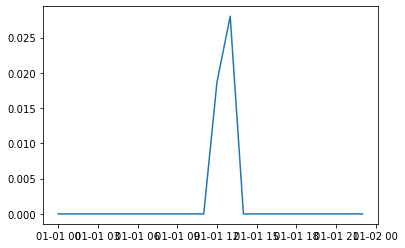

In [66]:
cooking_gas = cooking_gas.set_index("timestamp")
cooking_gas.index = cooking_gas.index.shift(-15, "T")
cooking_gas = cooking_gas.resample("H").sum()

plt.figure()
plt.plot(
    cooking_gas.index[:24],
    cooking_gas["out.electricity.cooking_range.energy_consumption"].iloc[:24].values
)
plt.show()

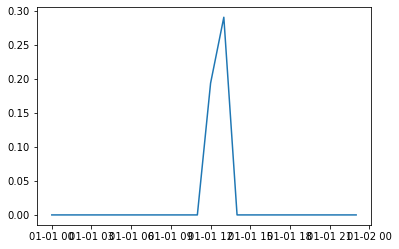

In [67]:
plt.figure()
plt.plot(
    cooking_gas.index[:24],
    cooking_gas["out.natural_gas.cooking_range.energy_consumption"].iloc[:24].values
)
plt.show()

In [69]:
annual_consumption = cooking_gas["out.electricity.cooking_range.energy_consumption"].sum()
print(annual_consumption)
annual_consumption = cooking_gas["out.natural_gas.cooking_range.energy_consumption"].sum()
print(annual_consumption)

42.930034344000006
445.5687155416699


In [70]:
cooking_gas.index = cooking_gas.index.strftime("%Y-%m-%dT%H:%M:%S")

cooking_gas["out.electricity.cooking_range.energy_consumption"].to_json(
    "../config_files/stoves/gas_stove_elec_consump.json",
    # date_format="iso",
    # date_unit="s"
)

cooking_gas["out.natural_gas.cooking_range.energy_consumption"].to_json(
    "../config_files/stoves/gas_stove_gas_consump.json",
    # date_format="iso",
    # date_unit="s"
)